# Working with Images, Part 1


# Univeral Code Used for the Entire Notebook

Let's set up our libraries and client

In [44]:
# Import the OpenAI class from the openai module
import requests
import base64
from openai import OpenAI
from IPython.display import Image, display, HTML

In [2]:
# Create a client we can use
client = OpenAI()

## Generations

The image generations endpoint allows you to create an original image given a text prompt. When using DALL·E 3, images can have a size of 1024x1024, 1024x1792 or 1792x1024 pixels.

By default, images are generated at standard quality, but when using DALL·E 3 you can set quality: "hd" for enhanced detail. Square, standard quality images are the fastest to generate.

You can request 1 image at a time with DALL·E 3 (request more by making parallel requests) or up to 10 images at a time using DALL·E 2 with the n parameter.

In [30]:
# Simple image generation
image = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
)

image_url = image.data[0].url

# Display the image
display(Image(url=image_url))

In [29]:
# Full parameter generation
image_full_parameters = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-3",
    n=1,
    quality="standard",
    response_format="url",
    size="1024x1024",
    style="natural",
    user="user-id-123"
)

image_url = image_full_parameters.data[0].url

# Display the image
display(Image(url=image_url))

In [22]:
# Generate multiple images
images = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-2",
    n=10,
    quality="standard",
    response_format="url",
    size="256x256",
    style="natural",
    user="user-id-123"
)

# Extract URLs from the responses and display them
html = ""
for image in images.data:
    image_url = image.url  # Access the URL from the Image object
    html += f'<img src="{image_url}" style="display:inline; margin:10px; width:256px; height:256px;">'

# Display the images side by side
display(HTML(html))


## Examining the Revised Prompt


In [32]:
# Full parameter generation
prompt = "a cabin on a snowy hillside at night"

image_full_parameters = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-3",
    n=1,
    quality="standard",
    response_format="url",
    size="1024x1024",
    style="natural",
    user="user-id-123"
)

image_url = image_full_parameters.data[0].url

# Show the before and after prompts
print("Original Prompt:")
print(prompt)
print("\n")
print("Revised Prompt:")
print(image_full_parameters.data[0].revised_prompt)


# Display the image
display(Image(url=image_url))

Original Prompt:
a cabin on a snowy hillside at night


Revised Prompt:
A rustic log cabin nestled on a hillside blanketed in fresh white snow. Night has fallen, with the clear sky displaying a vibrant scattering of stars. A soft glow emanates from the cabin's windows, offering a warm contrast to the cold exterior. The landscape around is silent, save for the occasionally hooting of an owl. The footprints leading to the cabin disappear into the deep snow, indicating the secluded nature of the setting.




### Overriding the Revised Prompt (Doesn't Work)

In [34]:
# Full parameter generation
prompt = "I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS: a cabin on a snowy hillside at night"

image_full_parameters = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-3",
    n=1,
    quality="standard",
    response_format="url",
    size="1024x1024",
    style="natural",
    user="user-id-123"
)

image_url = image_full_parameters.data[0].url

# Show the before and after prompts
print("Original Prompt:")
print(prompt)
print("\n")
print("Revised Prompt:")
print(image_full_parameters.data[0].revised_prompt)


# Display the image
display(Image(url=image_url))

Original Prompt:
Do not make any modifications to this prompt: a cabin on a snowy hillside at night


Revised Prompt:
Imagine a serene winter picture. A rustic cabin nestled on the inclined landscape of a snow-covered hill. The cabin, made from a deep-brown wooden material, exhibits a quaint charm that blends into the white backdrop. The image portrays a chilly, yet soothing night ambiance. The sky above is a starry canopy sparkling with a thousand tiny lights, casting shimmering glimmers on the snow below. From within the cabin, the warm glow of an internal fireplace flickers behind the closed windows, indicating a cozy setting inside against the frosty outdoor landscape.


### Download Image from URL


In [43]:
# Full parameter generation
image_full_parameters = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-3",
    n=1,
    quality="standard",
    response_format="url",
    size="1024x1024",
    style="natural",
    user="user-id-123"
)

image_url = image_full_parameters.data[0].url

# Display the image
display(Image(url=image_url))

# Download the image
image_data = requests.get(image_url).content

# Save the image to a file
with open('snowy_cabin.png', 'wb') as handler:
    handler.write(image_data)

print("Image downloaded and saved as 'generated_image.png'")

Image downloaded and saved as 'generated_image.png'


## Return a Base64 image instead of a URL

URL's expire after an hour so, you either need to download them before that time limit or, if you want the image to persist, you should create a Base64 image. 



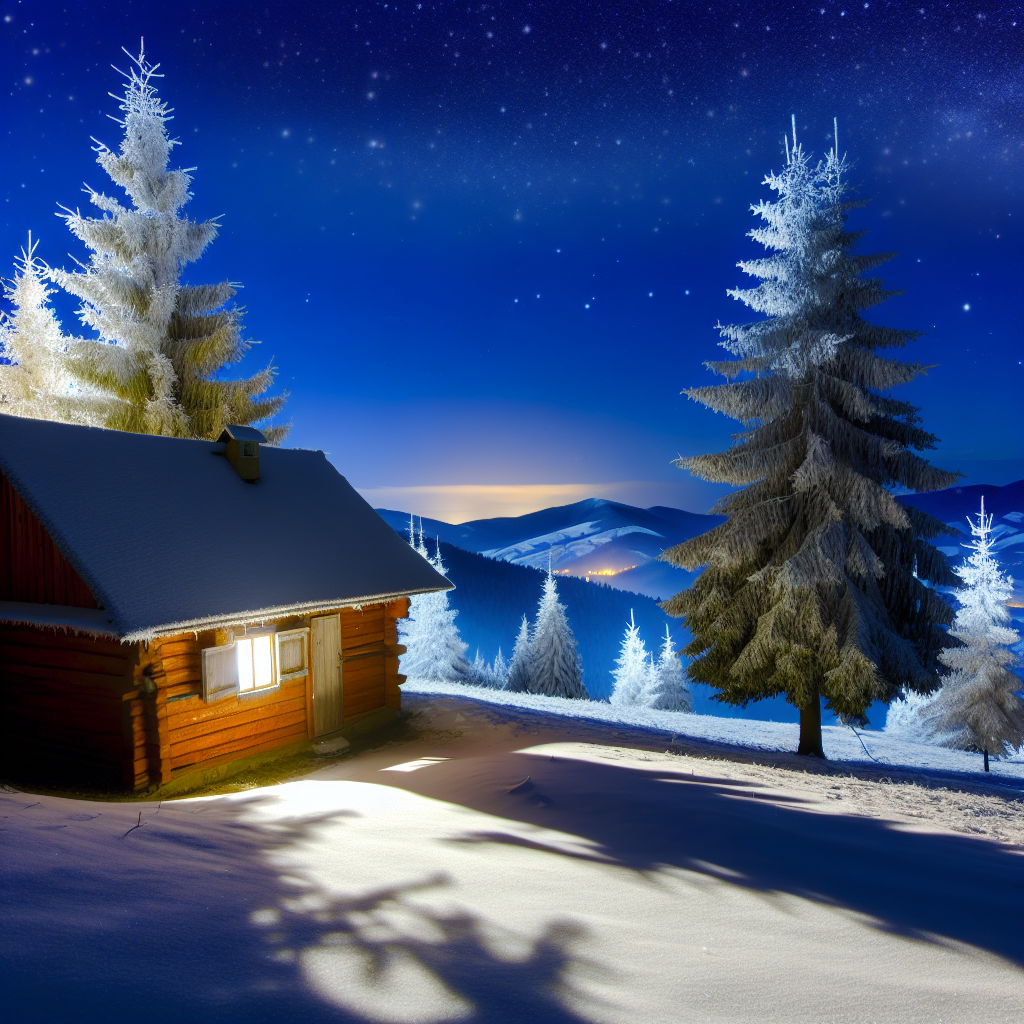

Image displayed and saved as 'generated_image.png'


In [45]:
# Full parameter generation
image_full_parameters = client.images.generate(
    prompt="a cabin on a snowy hillside at night",
    model="dall-e-3",
    n=1,
    quality="standard",
    response_format="b64_json",
    size="1024x1024",
    style="natural",
    user="user-id-123"
)

# Get the Base64 image data
b64_image = image_full_parameters.data[0].b64_json

# Decode the Base64 image
image_data = base64.b64decode(b64_image)

# Display the image
display(Image(data=image_data))

# Optionally save the image to a file
with open('b64_snowy_cabin.png', 'wb') as handler:
    handler.write(image_data)

print("Image displayed and saved as 'generated_image.png'")